# 单线性插值
* x 轴表示某一方向的坐标位置    
* *y 轴表示对应位置的像素值*  
 ![](./images/linear_interpolation_01.png)  
假设插值函数是多项式 f(x), 我们用一元一次线性函数来近似逼近插值函数，这样已知 ($x_0$, $y_0$), ($x_1$, $y_1$) 以及 $x$ 我们就可以求出 $x$ 对应的像素值 $y$：
$$
f(x)\approx y = \frac{x_1-x}{x_1-x_0}y_0 + \frac{x-x_0}{x_1-x_0}y_1
$$

# 双线性插值
## 双线性插值求解示意图 
**双线性插值是分别在两个方向（x, y）计算了共 3 次单线性插值，如下图所示，其中沿着 x 轴计算了 2 次，y 轴计算了 1 次**
* x,y 轴表示（横、纵两个方向的）坐标位置
* *z 轴表示对应的像素值*  
* 求 Z 点的插值过程：(1) 先求 x 方向的 Z1、Z2 对应坐标的像素值 (2) 再通过 Z1、Z2 求 y 方向的 Z 的插值  
  ![](./images/bilinear_interpolation_01.jpeg)  
  
## 具体求解过程
### 公式推导
如坐标图所示，用横纵坐标代表图像像素的位置，f(x,y)代表该像素点(x,y)的彩色值或灰度值。  
![](./images/bilinear_interpolation_02.png)
#### 第一步
将缩放后的图像（dst_img）像素的坐标位置(dst_x, dst_y) 在原图(src_img)坐标系中标出来:
$$
src_x = dst_x * (src_w / dst_w)
$$
$$
src_y= dst_y * (src_h / dst_h)
$$
上式中，$dst_x$ 与 $dst_y$ 为目标图像的某个像素的横纵坐标(自己的坐标系中)，$dst_w$ 与 $dst_h$ 为目标图像的宽与高；$src_w$与 $src_h$ 为原图像的宽与高。$src_x$，$src_y$ 为目标图像在该点（$dst_x$，$dst_y$）对应的原图像的坐标表示。

#### 第二步
现在假设目标图像的像素点(x’，y’)映射到原图像中是(x,y)，也就是图中的P点。设$Q_{11} = (x_1, y_1)、Q_{12} = (x_1, y_2)、Q_{21} = (x_2, y_1) 、 Q_{22} = (x_2, y_2)$，图中 $Q_{11}, Q_{12}, Q_{21}, Q_{22}$ 分别为距离 $P$ 点的最近的四个点。分别在$X$方向进行两次插值，最后在 $y$ 方向进行插值即可得到目标图像的像素值。公式如下：
    1. 先计算 $X$ 方向的线性插值 $f(R1)、f(R2)$：
    $$
    f(R1)\approx \frac{x_2-x}{x_2-x_1}Q_{11} + \frac{x-x_1}{x_2-x_1}Q_{21}
    $$
    $$
    f(R2)\approx \frac{x_2-x}{x_2-x_1}Q_{12} + \frac{x-x_1}{x_2-x_1}Q_{22}
    $$
    2. 再计算 $Y$ 方向的线性插值 $f(P)$
    $$
    f(P)\approx \frac{y_2-y}{y_2-y_1}f(R1) + \frac{y-y_1}{y_2-y_1}f(R2)
    $$
    3. 简化公式，得:
    $$
    f(x,y)=f(P)\approx \frac{1}{(x_2-x_1)(y_2-y_1)}[f(Q_{11})(x_2-x)(y_2-y)+f(Q_{21})(x-x_1)(y_2-y)+f(Q_{12})(x_2-x)(y-y_1)+f(Q_{22})(x-x_1)(y-y_1)]
    $$
    4. 由于 $Q_{11}, Q_{12}, Q_{21}, Q_{22}$ 是最邻近的点，所以四个点的坐标之间相差 1，即分母为 1，得：
    $$
    f(x,y)=f(P)\approx [f(Q_{11})(x_2-x)(y_2-y)+f(Q_{21})(x-x_1)(y_2-y)+f(Q_{12})(x_2-x)(y-y_1)+f(Q_{22})(x-x_1)(y-y_1)]
    $$

### 示例
* 题：如下图所示，将原图像（左下）放大两倍（对像素数扩大2倍）得到目标图像（右下），求 ? 处的像素.

* 解：
右边图中问号的坐标为(5,4)，映射到原图像的像素点的坐标为:

$$
src_x = dst_x * (src_w / dst_w) = 5*(4/8)=2.5
$$
$$
src_y= dst_y * (src_h / dst_h) = 4*(4/8)=2
$$

由上面的计算，可以得出 $Q_{11}$ 坐标 (i, j), 对应其余3点取 (i+1, j)、(i, j+1)、(i+1, j+1):
$$
Q_{11}(2,2)，Q_{21}(3,2)，Q_{12}(2,3)，Q_{22}(3,3)，P(2.5,2)
$$

采用双线性插值法得到红色框处的像素值：
$$
f(P) = f(2.5, 2) = f(Q_{11})(3-2.5)(3-2) + f(Q_{21})(2.5-2)(3-2) + f(Q_{12}(3-2.5)(2-2) + f(Q_{22}(2.5-2)(2-2))) = f(Q_{11})*0.5 + f(Q_{21})*0.5
$$

![](./images/bilinear_interpolation_03.png)

假设原图每个像素点的 RGB 对应如下：
```
　　204,255,153  153,255,153   102,255,153   0,255,153

　　204,255,102  153,255,102   102,255,102   0,255,0

　　204,255,51   153,255,51    102,255,51    51,204,51

　　204,204,0    153,204,0     102,153,0     0,153,0
```
最终得到放大后的图像像素为:
$$
R=0.5*102+0.5*51=51+25.5=76.5
$$

$$
G=0.5*255+0.5*204=127.5+102=229.5
$$

$$
B=0.5*51+0.5*51=25.5+25.5=51
$$

* 【特别注意】  
当出现 i 或 j 为边界坐标时，会出现(i+1,j)、(i,j+1)、(i+1,j+1)的点在实际的图中不存在，此时可以用(i,j)、(i-1,j)、(i,j-1)、(i-1,j-1)。如果 src_x 与 src_y 是整数，则其中一个点是(i,j)，剩余的3个点其实无所谓，f(p)=f(i,j)

# 代码实现
## 使用 OpenCV 实现双线性插值

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img shape: (200, 200, 3)


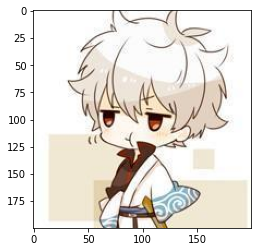

In [21]:
# raw img
img = cv2.imread('images/king.png')
print(f"img shape: {img.shape}")
h, w, c = img.shape
plt.imshow(img[:,:,::-1])

interpolation value: bilinear
interpolation value: nearest
interpolation value: cubic
interpolation value: lanczos4
interpolation value: area


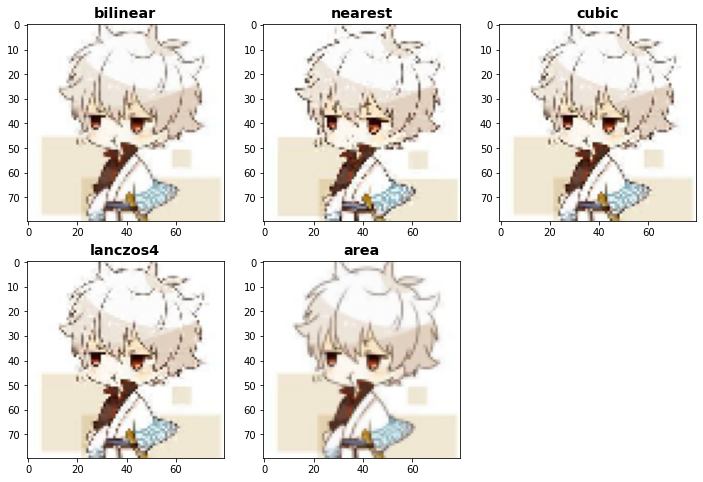

In [53]:
# 按比例缩小
ratio = 0.4
dst_h = int(h*ratio)
dst_w = int(w*ratio)

# cv2.INTER_LINEAR: 双线性插值 (default)
# cv2.INTER_NEAREST: 最近邻插值
# cv2. INTER_CUBIC: 像素邻域的双三次插值；
# cv2. INTER_LANCZOS4: 像素邻域的Lanczos插值；
# cv2. INTER_AREA: 像素关系重采样
interpolations = {
    cv2.INTER_LINEAR: "bilinear",
    cv2.INTER_NEAREST: "nearest",
    cv2.INTER_CUBIC: "cubic",
    cv2.INTER_LANCZOS4: "lanczos4",
    cv2.INTER_AREA: "area"
}
plt.figure(figsize=(12,8))
for i, (k, v) in enumerate(interpolations.items()):
    sub_plt = plt.subplot(2,3, i+1)
    print(f"interpolation value: {v}")
    img_dst = cv2.resize(img, (dst_w, dst_h), interpolation=k)
    sub_plt.imshow(img_dst[:,:,::-1])
    plt.title(v, fontsize='x-large', fontweight='heavy')

## 手动实现双线性插值

src_h 200, src_w: 200
dst_h 80, dst_w: 80


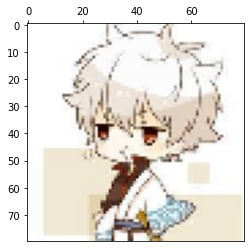

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

def bilinear_interpolation(src_img, width_coe , height_coe):
    src_h = src_img.shape[0]
    src_w = src_img.shape[1]
    print(f"src_h {src_h}, src_w: {src_w}")
    
    dst_w = int(width_coe*src_w)
    dst_h = int(height_coe*src_h)
    print(f"dst_h {dst_h}, dst_w: {dst_w}")
    
    dst_img = np.zeros(shape=(dst_h, dst_w, 3), dtype=int)  # 默认是float64
    
    # 遍历目标图像的每一个像素
    for dst_y in range(0,dst_h):
        for dst_x in range(0,dst_w):
            Q = [(0, 0)] * 4  # Q11=Q12=Q21=Q22=0
            Qdict = {}
            # 目标图片像素坐标在原图坐标中的表示
            dst_x2src_x = dst_x * (src_w / dst_w)
            dst_y2src_y = dst_y * (src_h / dst_h)
            u = round(dst_x2src_x % 1, 2)
            v = round(dst_y2src_y % 1, 2)
            if int(dst_x2src_x)==src_w-1:
                positionX = [int(dst_x2src_x)-1, int(dst_x2src_x)]  # 左右范围
            else:
                positionX=[int(dst_x2src_x),int(dst_x2src_x)+1]#左右范围
            if int(dst_y2src_y)==src_h-1:
                positionY = [int(dst_y2src_y)-1, int(dst_y2src_y)]  # 上下范围
            else:
                positionY = [int(dst_y2src_y), int(dst_y2src_y) + 1]  #上下范围
            k=0
            for m in range(0, 2):  # 得到Q的四个点坐标，分别是Q11,Q12,Q21,Q22
                for n in range(0, 2):
                    Q[k] = (positionX[m], positionY[n])
                    Qdict[Q[k]] = src_img[positionY[n], positionX[m]]
                    k = k + 1
            # 通过四个点计算得到dst的像素值
            dst_img[dst_y][dst_x] = Qdict[Q[0]] * (1 - u) * (1 - v) + Qdict[Q[1]] * (1 - u) * (v) + Qdict[Q[2]] * (u) * (
                        1 - v) + Qdict[Q[3]] * (u) * (v)

    ax = plt.gca()  # 获取到当前坐标轴信息
    ax.xaxis.set_ticks_position('top')  # 将X坐标轴移到上面
    plt.imshow(dst_img)  # 显示数组
    plt.show()
    plt.imsave('output.jpg', dst_img.astype(np.uint8))  # matplotlib 保存图像的时候，只接受浮点数或者unit8的整数类型
 

image_path = r'images/king.png'
img_vec = cv2.imread(image_path)[:,:,::-1]
factor = 0.4
bilinear_interpolation(img_vec, width_coe=factor, height_coe=factor)

## 附录
* https://www.cnblogs.com/wancy/p/15212604.html （主要参考内容，非常感谢）